In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [2]:
# loading grid search results
df = pd.read_csv('grid_search_results.csv')

In [3]:
# identifying parameter columns (columns where parameter settings are saved)
param_cols = [c for c in df.columns if c.startswith('param_')]

In [4]:
# getting best parameter combination (rank_test_score = 1)
best = df.loc[df['rank_test_score'] == 1, param_cols].iloc[0]

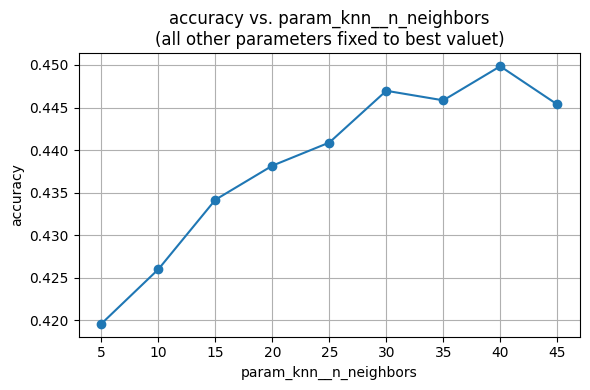

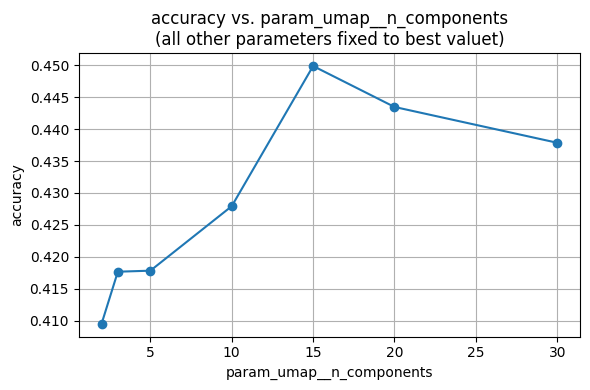

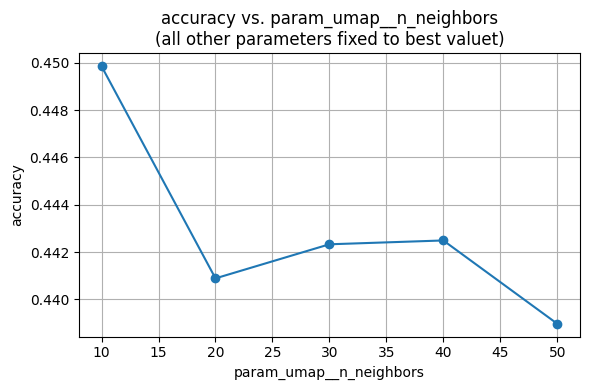

In [13]:
# plotting for each parameter
for p in param_cols:
    # creating subsets
    others = [q for q in param_cols if q != p]
    data = (df[others] == best[others]).all(axis=1)
    subset = df[data].sort_values(by=p)

    # plot
    plt.figure(figsize=(6,4))
    plt.plot(subset[p], subset['mean_test_score'], marker='o', linestyle='-')
    plt.xlabel(p)
    plt.ylabel('accuracy')
    plt.title(f'accuracy vs. {p}\n(all other parameters fixed to best valuet)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()